In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_hybrid = pd.read_excel('../mf/all-hybrid-funds-2022.xlsx', skiprows=5, index_col=0)

In [4]:
all_hybrid

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Arbitrage Fund - Direct Plan,3,HY-AR,0.33,2013-01-01 00:00:00,4353,8.1,Average,Average,Low,0.72,...,0.06,8.63,8.19,7.16,6.29,6.62,6.8,4.74,4.52,4.8
Aditya Birla Sun Life Asset Allocator FoF - Direct Plan,--,HY-MAA,0.52,2013-01-01 00:00:00,159,3.4,--,--,High,13.93,...,0.88,-30.8,5.18,11.84,18.03,-0.9,7.75,21.59,19.88,2.39
Aditya Birla Sun Life Balanced Advantage Fund - Direct Plan,4,HY-DAA,0.59,2013-01-01 00:00:00,6707,5.8,Above Average,Above Average,Very High,14.48,...,0.91,28.82,4.03,16.79,16.7,1.91,9.25,16.64,14.82,5.51
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,2,HY-AH,1.04,2013-01-01 00:00:00,7496,6.2,Above Average,Below Average,Very High,18.35,...,0.93,50.01,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97
Aditya Birla Sun Life Equity Savings Fund - Direct Plan,2,HY-EQ S,1.29,2014-11-28 00:00:00,485,8.1,Above Average,Below Average,Moderately High,10.04,...,0.82,--,4.75,8.97,18.72,-0.58,8.81,12.01,14.04,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Regular Saving Fund Segregated Portfolio - Direct Plan,--,HY-CH,--,2020-02-17 00:00:00,46,2.9,--,--,Moderately High,--,...,--,--,--,--,--,--,--,--,-15.58,--
UTI Regular Savings Fund - Direct Plan,3,HY-CH,1.19,2013-01-01 00:00:00,1575,10.0,Above Average,Average,Moderately High,6.85,...,0.82,21.69,7.73,9.72,13.36,4.07,3.53,10.92,13.83,3.91
UTI Retirement Benefit Pension Fund - Direct Plan,--,HY-BH,1.05,2013-01-01 00:00:00,3727,10.0,--,--,High,9.58,...,0.93,23.75,5.87,10.79,17.73,-0.57,-0.45,13.17,19.32,6.03


In [5]:
all_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Aditya Birla Sun Life Arbitrage Fund - Direct Plan to WhiteOak Capital Balanced Advantage Fund - Direct Plan
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 195 non-null    object 
 1   Category               195 non-null    object 
 2   Expense Ratio (%)      195 non-null    object 
 3   Launch                 195 non-null    object 
 4   Net Assets (Cr)        195 non-null    object 
 5   Fund Manager (Tenure)  195 non-null    float64
 6   Fund Risk Grade        195 non-null    object 
 7   Fund Return Grade      195 non-null    object 
 8   Riskometer             195 non-null    object 
 9   Standard Deviation     195 non-null    object 
 10  Sharpe Ratio           195 non-null    object 
 11  Sortino Ratio          195 non-null    object 
 12  Beta                   195 non-null    object 
 13  Alpha          

# Data Exploration

Convert return strings to numeric values

In [6]:
all_hybrid['Rating'] = all_hybrid['Rating'].apply(pd.to_numeric, errors='coerce')

In [7]:
all_hybrid.iloc[:, 2:3] = all_hybrid.iloc[:, 2:3].apply(pd.to_numeric, errors='coerce')

In [8]:
all_hybrid.iloc[:, 4:6] = all_hybrid.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [9]:
all_hybrid.iloc[:, 9:] = all_hybrid.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [10]:
all_hybrid

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Arbitrage Fund - Direct Plan,3.0,HY-AR,0.33,2013-01-01 00:00:00,4353.0,8.1,Average,Average,Low,0.72,...,0.06,8.63,8.19,7.16,6.29,6.62,6.80,4.74,4.52,4.80
Aditya Birla Sun Life Asset Allocator FoF - Direct Plan,NaN,HY-MAA,0.52,2013-01-01 00:00:00,159.0,3.4,--,--,High,13.93,...,0.88,-30.80,5.18,11.84,18.03,-0.90,7.75,21.59,19.88,2.39
Aditya Birla Sun Life Balanced Advantage Fund - Direct Plan,4.0,HY-DAA,0.59,2013-01-01 00:00:00,6707.0,5.8,Above Average,Above Average,Very High,14.48,...,0.91,28.82,4.03,16.79,16.70,1.91,9.25,16.64,14.82,5.51
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,2.0,HY-AH,1.04,2013-01-01 00:00:00,7496.0,6.2,Above Average,Below Average,Very High,18.35,...,0.93,50.01,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97
Aditya Birla Sun Life Equity Savings Fund - Direct Plan,2.0,HY-EQ S,1.29,2014-11-28 00:00:00,485.0,8.1,Above Average,Below Average,Moderately High,10.04,...,0.82,NaN,4.75,8.97,18.72,-0.58,8.81,12.01,14.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Regular Saving Fund Segregated Portfolio - Direct Plan,NaN,HY-CH,NaN,2020-02-17 00:00:00,46.0,2.9,--,--,Moderately High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.58,NaN
UTI Regular Savings Fund - Direct Plan,3.0,HY-CH,1.19,2013-01-01 00:00:00,1575.0,10.0,Above Average,Average,Moderately High,6.85,...,0.82,21.69,7.73,9.72,13.36,4.07,3.53,10.92,13.83,3.91
UTI Retirement Benefit Pension Fund - Direct Plan,NaN,HY-BH,1.05,2013-01-01 00:00:00,3727.0,10.0,--,--,High,9.58,...,0.93,23.75,5.87,10.79,17.73,-0.57,-0.45,13.17,19.32,6.03


In [11]:
all_hybrid.describe()

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,149.000000,186.000000,190.000000,195.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,91.000000,109.000000,115.000000,123.000000,127.000000,142.000000,157.000000,166.000000,176.000000
mean,3.013423,0.721559,2952.573684,4.241026,10.413121,0.727197,0.876752,0.747006,1.541019,0.719299,26.701099,5.483853,8.526783,16.923902,1.780157,8.153099,12.197962,16.454940,4.362670
std,1.090416,0.403365,7289.506871,2.919815,6.022947,0.344344,0.517935,0.238635,2.922722,0.308950,14.507184,3.111588,3.230831,8.729014,3.654688,4.161004,6.894682,11.264643,4.077576
min,1.000000,0.040000,7.000000,0.000000,0.650000,-0.510000,-0.840000,0.080000,-6.300000,0.000000,-30.800000,-6.140000,-0.750000,1.990000,-13.380000,-6.840000,-13.400000,-15.580000,-6.220000
25%,2.000000,0.382500,116.750000,1.700000,5.970000,0.560000,0.600000,0.570000,0.080000,0.720000,17.605000,3.680000,6.885000,10.370000,-0.645000,6.532500,9.260000,8.902500,2.355000
50%,3.000000,0.645000,582.000000,3.600000,10.120000,0.700000,0.810000,0.770000,1.190000,0.860000,23.750000,5.870000,8.390000,15.400000,1.950000,8.540000,12.370000,14.755000,4.530000
75%,4.000000,1.022500,2574.750000,6.600000,16.010000,0.880000,1.090000,0.880000,2.280000,0.920000,35.085000,7.840000,10.440000,24.445000,4.575000,10.267500,15.290000,23.037500,5.955000
max,5.000000,1.860000,56710.000000,10.600000,23.140000,1.690000,2.950000,1.480000,16.910000,0.980000,56.830000,14.400000,16.910000,48.400000,8.620000,17.970000,37.280000,80.010000,22.170000


In [12]:
all_hybrid.isnull().sum()

Rating                    46
Category                   0
Expense Ratio (%)          9
Launch                     0
Net Assets (Cr)            5
Fund Manager (Tenure)      0
Fund Risk Grade            0
Fund Return Grade          0
Riskometer                 0
Standard Deviation        38
Sharpe Ratio              38
Sortino Ratio             38
Beta                      38
Alpha                     38
R-Squared                 38
2014                     104
2015                      86
2016                      80
2017                      72
2018                      68
2019                      53
2020                      38
2021                      29
2022                      19
dtype: int64

In [13]:
all_hybrid.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,,,
HY-AH,42,46,48,47,48,48,48,48,42,42,...,42,25,26,28,31,33,38,42,44,45
HY-AR,23,27,27,27,27,27,27,27,24,24,...,24,10,16,16,18,18,21,24,26,26
HY-BH,0,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
HY-CH,28,32,35,34,35,35,35,35,28,28,...,28,22,23,24,25,25,25,28,29,31
HY-DAA,22,30,31,30,31,31,31,31,22,22,...,22,11,14,14,15,16,19,22,23,27
HY-EQ S,22,22,24,23,24,24,24,24,22,22,...,22,6,11,14,15,16,20,22,22,21
HY-MAA,12,25,26,25,26,26,26,26,15,15,...,15,13,15,15,15,15,15,15,18,22


In [14]:
pd.crosstab(all_hybrid['Fund Return Grade'], all_hybrid['Fund Risk Grade'])

Fund Risk Grade,--,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,,
--,46,0,0,0,0,0
Above Average,0,7,7,10,0,8
Average,0,12,25,12,4,0
Below Average,0,13,9,9,1,2
High,0,2,5,3,3,2
Low,0,1,6,0,7,1


<AxesSubplot:xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

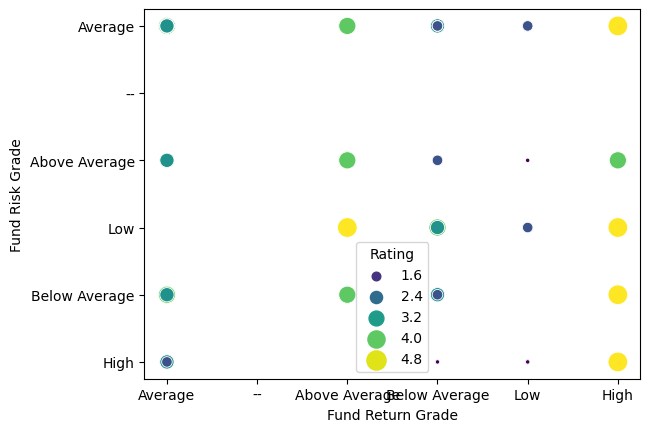

In [15]:
sns.scatterplot(data=all_hybrid, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [16]:
num_columns = all_hybrid.select_dtypes('number').columns.to_list()

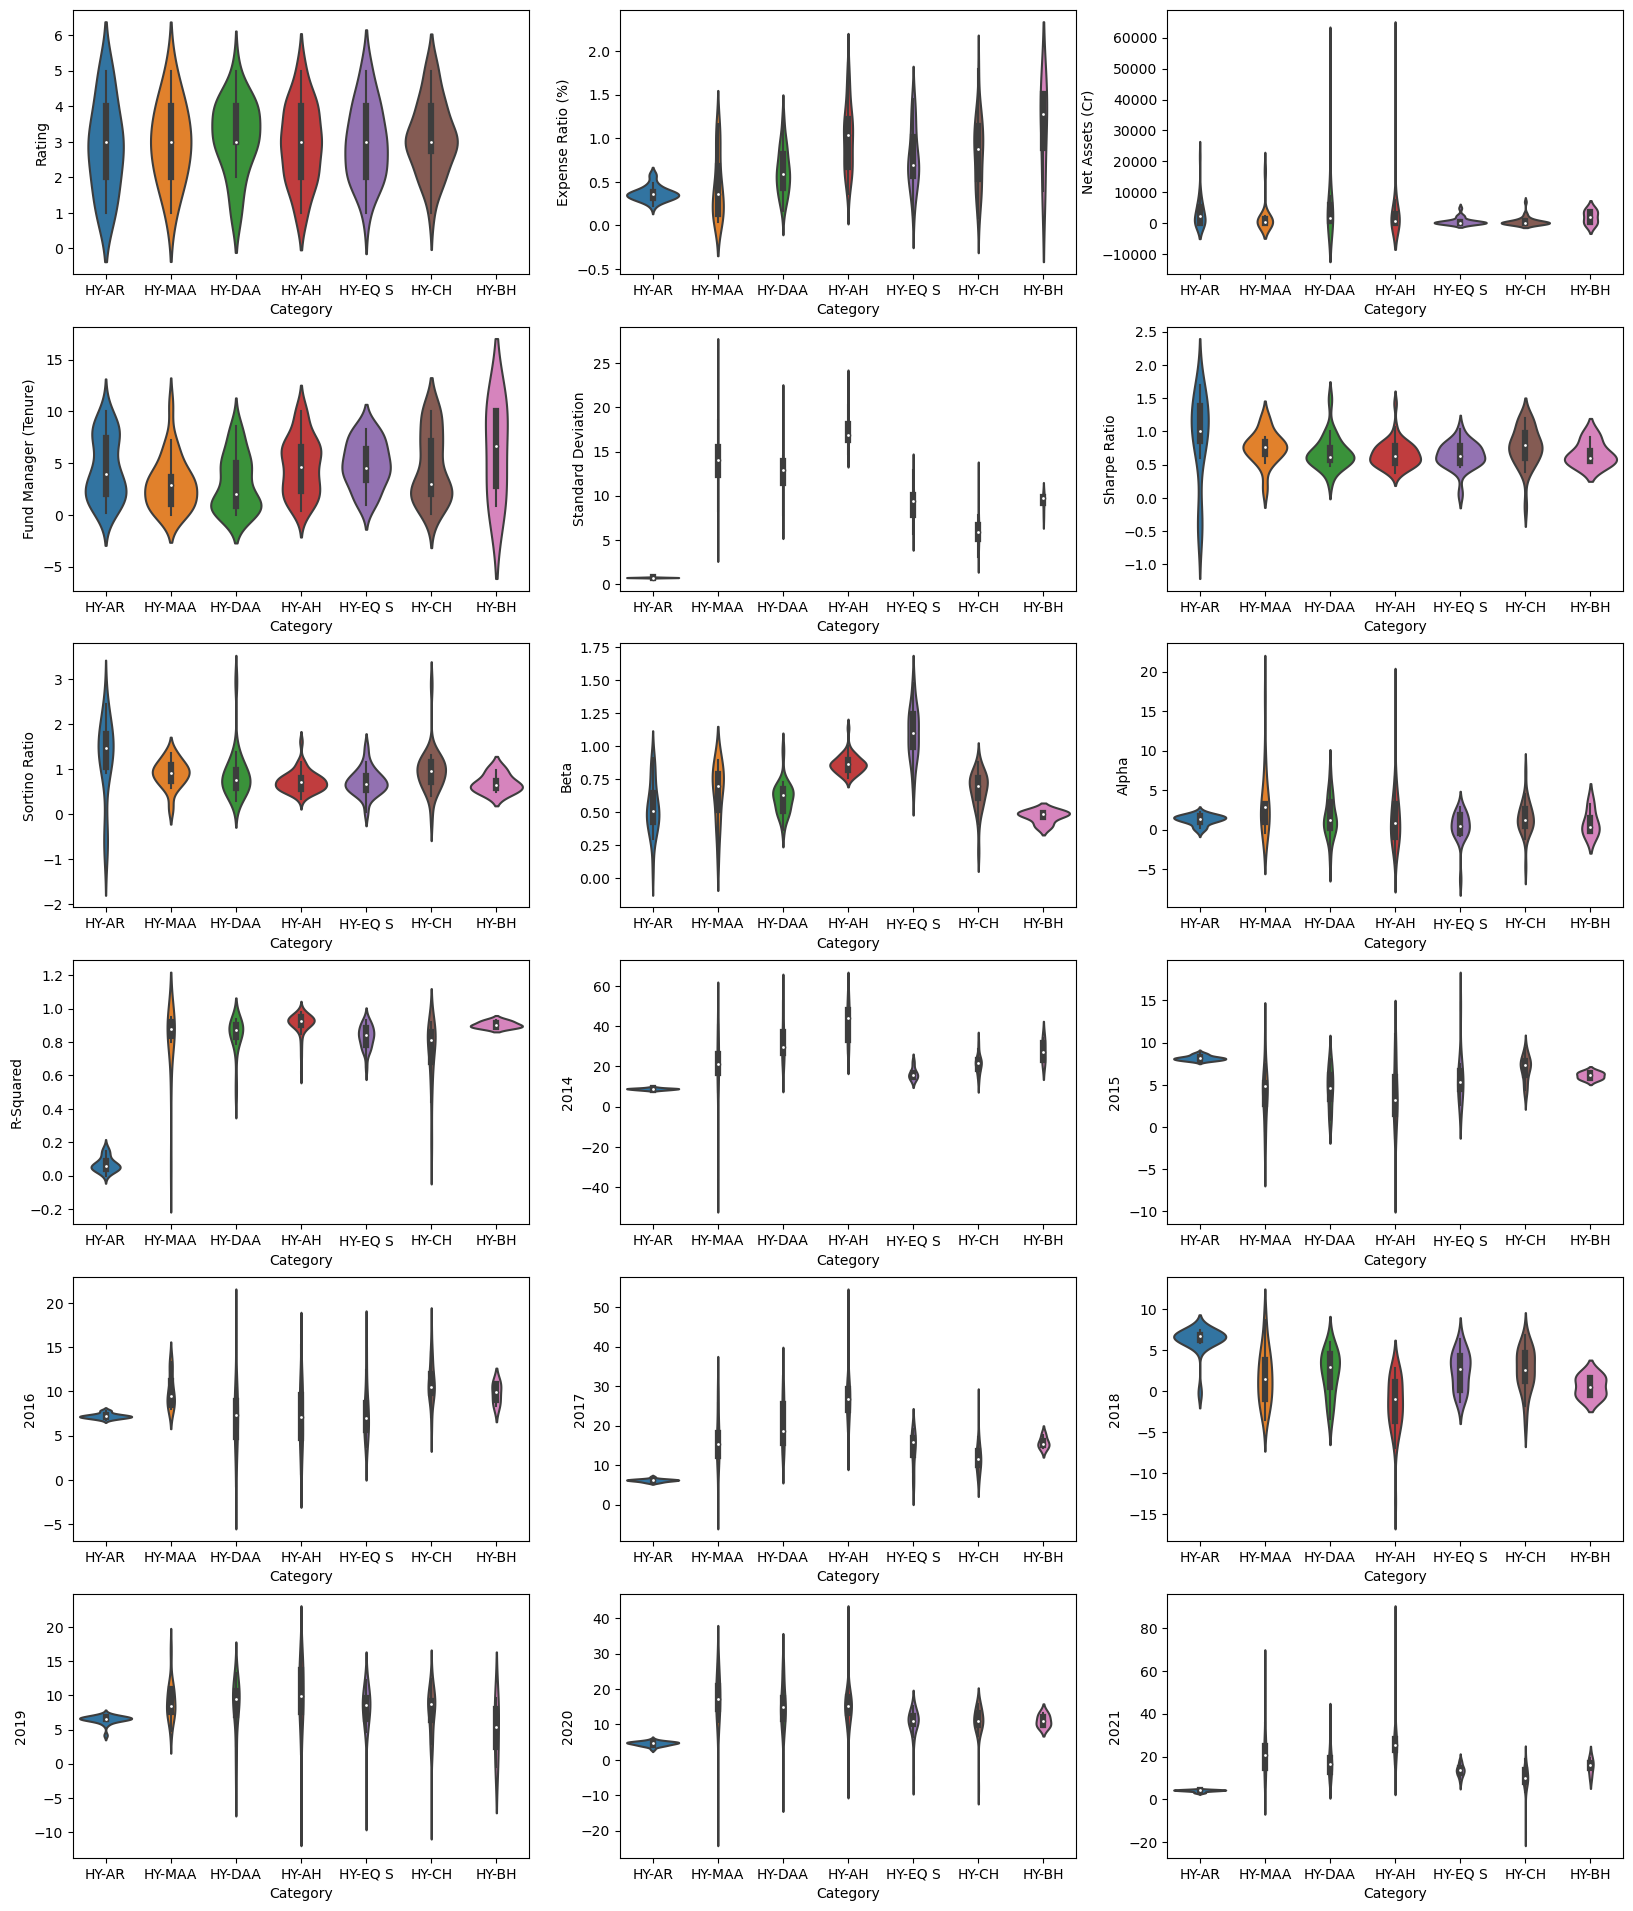

In [17]:
fig, axes = plt.subplots(6,3,figsize=(20,24))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(data=all_hybrid, x='Category', y=all_hybrid.loc[:, num_columns[i]], ax=ax)

<AxesSubplot:xlabel='Category', ylabel='2022'>

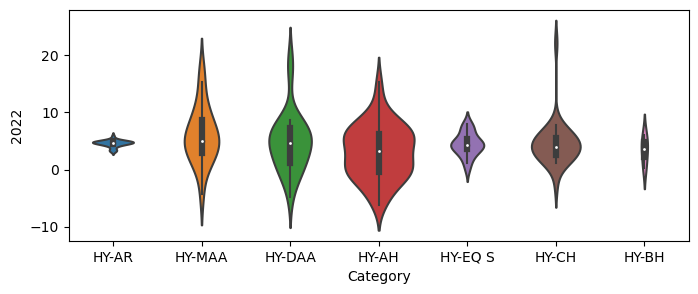

In [23]:
plt.figure(figsize=(8,3))
sns.violinplot(data=all_hybrid, x='Category', y=2022, scale='count')

In [24]:
all_hybrid.groupby('Category').mean()

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
HY-AH,2.952381,1.002391,3663.893617,4.741667,17.176667,0.659048,0.730952,0.867857,1.629286,0.908810,41.724800,3.631923,7.197500,27.131613,-1.577273,9.679474,15.731429,27.433182,3.104667
HY-AR,2.869565,0.369630,3460.629630,4.462963,0.730417,0.911667,1.207917,0.533333,1.272917,0.069167,8.848000,8.191875,7.234375,6.161667,6.222222,6.492857,4.609583,4.091538,4.605385
HY-BH,NaN,1.117500,2083.000000,6.075000,9.297500,0.660000,0.682500,0.470000,0.885000,0.905000,27.617500,6.100000,9.795000,15.705000,0.560000,5.002500,11.067500,15.437500,3.385000
HY-CH,3.142857,0.833125,716.352941,4.645714,6.028571,0.770357,0.961429,0.668571,1.487143,0.738214,21.300455,6.905652,11.030000,11.989600,2.595200,7.246000,10.905000,9.662414,4.494194
HY-DAA,3.136364,0.627667,6567.166667,3.070968,12.632273,0.682273,0.875455,0.610909,1.585000,0.838636,32.920909,4.587143,7.204286,20.600000,2.148750,8.289474,14.716818,17.083913,4.802222
HY-EQ S,3.000000,0.774091,761.217391,4.908333,9.113182,0.639091,0.711818,1.098636,0.422273,0.830455,16.466667,5.943636,7.712857,14.080667,2.438125,7.873000,10.463182,13.487727,4.421429
HY-MAA,3.000000,0.445200,1925.520000,3.038462,14.101333,0.755333,0.892667,0.654667,3.574667,0.806000,19.860769,3.960667,10.037333,16.458667,1.708000,9.163333,16.010667,21.470000,6.045909


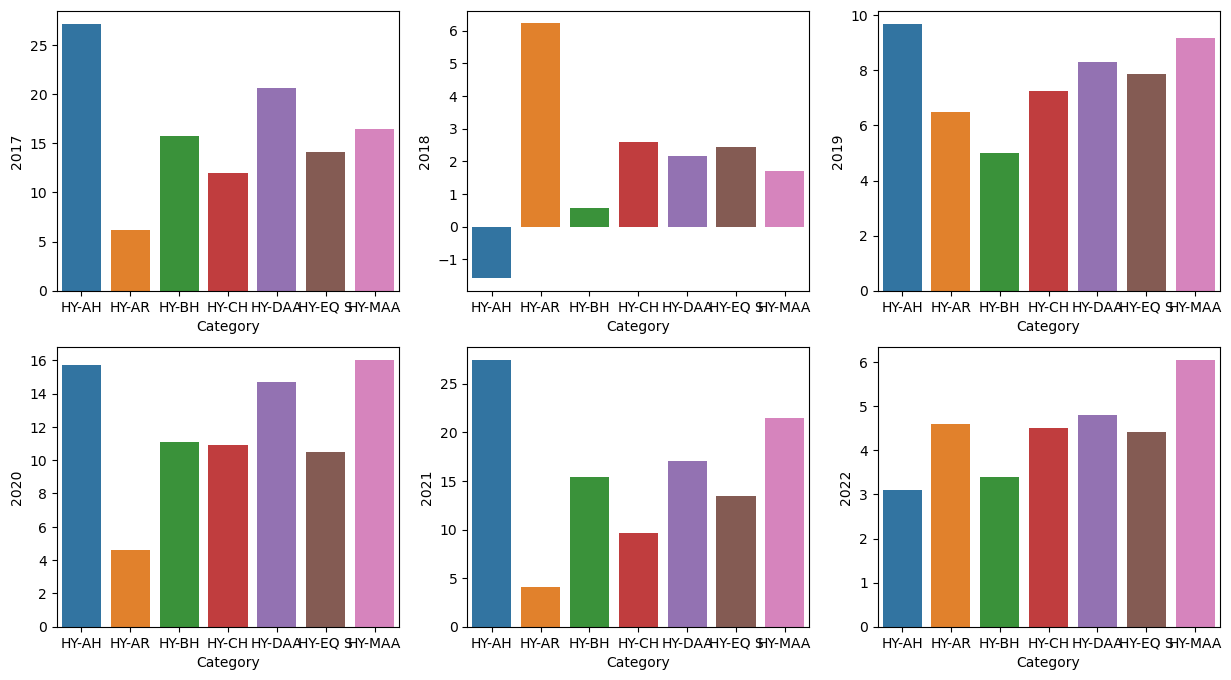

In [26]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=all_hybrid.groupby('Category').mean(), x=all_hybrid.groupby('Category').mean().index, y=all_hybrid.groupby('Category').mean().iloc[:, i+13], ax=ax)

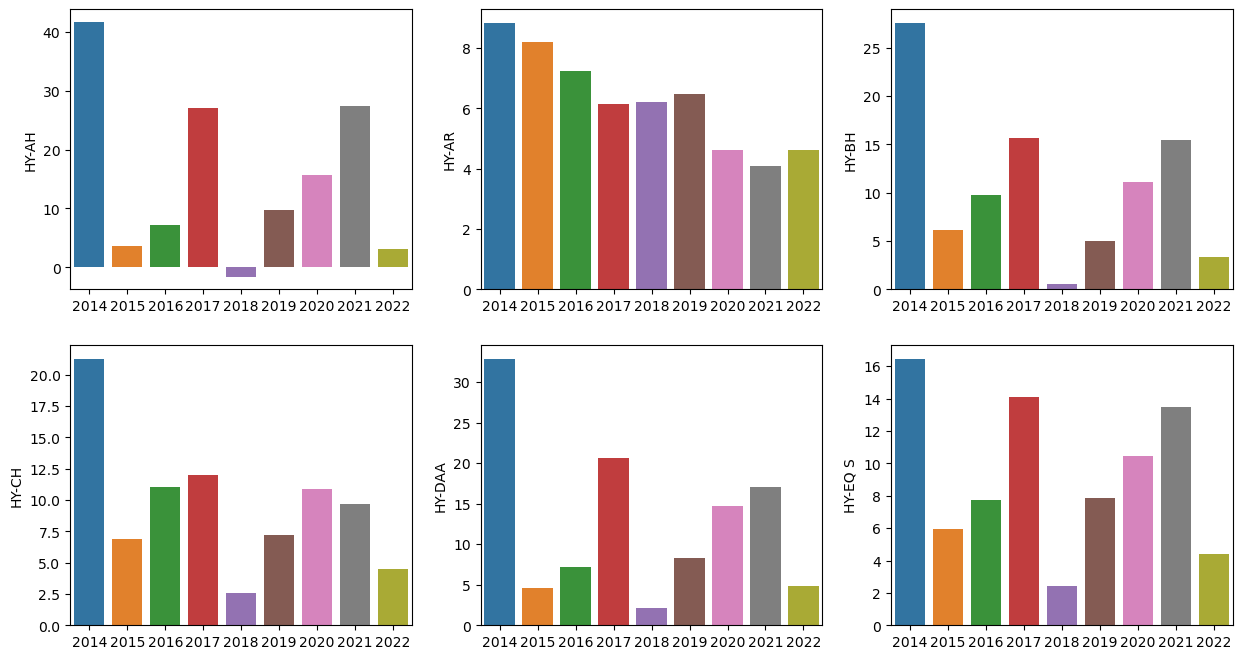

In [29]:
df = all_hybrid.groupby('Category').mean().swapaxes("index", "columns").iloc[10:, :]
fig, axes = plt.subplots(2,3,figsize=(15,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], ax=ax)

In [31]:
all_hybrid.groupby('Category').std().sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
HY-AR,1.289973,0.084055,4762.005606,3.037351,0.030713,0.666527,0.916107,0.197102,0.625449,0.043531,0.438933,0.280457,0.280974,0.359268,1.651247,0.620622,0.621397,0.506002,0.574068
HY-EQ S,1.069045,0.349253,1178.283573,2.252133,1.689650,0.197144,0.291607,0.195431,1.881931,0.069521,2.952847,3.200126,3.132891,4.481692,2.278892,3.769244,4.188088,2.683072,2.026475
HY-BH,NaN,0.532377,2147.765971,4.645697,0.998545,0.180370,0.204512,0.046904,1.679137,0.019149,5.638046,0.415131,1.205584,1.468843,1.286908,4.457364,1.740314,3.618078,2.424823
HY-CH,1.007905,0.394220,1369.408607,3.323653,1.638309,0.294020,0.491978,0.144086,2.144296,0.195070,4.457872,1.491643,2.413893,3.970304,2.601274,4.044833,4.430364,5.942891,3.936570
HY-AH,1.103263,0.369397,9060.639176,2.751698,1.618736,0.196777,0.235266,0.070695,3.879577,0.068010,9.563962,3.806190,3.626705,6.156366,3.416785,5.370107,6.594203,11.045441,4.709363
HY-MAA,1.128152,0.369866,4587.146427,2.536309,4.006179,0.246399,0.307350,0.216823,4.430932,0.231171,18.044463,3.336357,1.910110,7.003545,3.260844,2.792916,9.358959,11.477539,4.987184
HY-DAA,1.037187,0.264662,12223.573249,2.690005,2.461414,0.247366,0.535775,0.122276,2.499466,0.115565,10.692548,2.348186,4.072302,6.251575,2.707784,4.158184,7.264429,6.711892,5.165995


In [33]:
iqr = all_hybrid[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_hybrid[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
HY-AR,2.00,0.0700,5299.0,5.350,0.0325,0.5325,0.7175,0.2250,0.6875,0.0500,0.5800,0.3675,0.3100,0.4075,0.6275,0.3100,0.7225,0.5000,0.4700
HY-EQ S,2.00,0.4525,415.0,3.025,2.2400,0.2475,0.3250,0.2500,2.1650,0.1050,1.7400,2.0550,3.0750,4.2000,4.0550,3.1375,2.4350,2.6625,1.8700
HY-BH,NaN,0.6225,3485.0,7.225,0.7125,0.1600,0.1575,0.0250,1.5850,0.0250,8.2275,0.5900,1.8050,1.1000,2.1400,5.5425,2.2825,2.3375,2.5400
HY-CH,1.25,0.6000,607.0,5.100,1.5700,0.3775,0.4300,0.1550,2.1100,0.1775,4.2425,1.6050,2.1675,3.6300,3.4200,2.8000,3.5250,5.5300,3.0900
HY-MAA,2.00,0.5500,1278.0,2.650,3.1700,0.1850,0.3500,0.2700,2.2900,0.0850,9.3900,2.4600,2.6650,5.9250,4.7200,3.3050,6.5950,10.2075,5.7325
HY-DAA,1.00,0.3950,5278.5,4.100,2.4775,0.1825,0.4000,0.1650,3.2800,0.0675,10.6850,2.9200,4.0725,9.6700,4.0050,3.4400,5.7175,6.4750,6.0000
HY-AH,2.00,0.5500,2961.0,4.275,1.8100,0.2500,0.2500,0.0775,4.0750,0.0450,14.6900,4.3850,4.9425,5.1150,4.6700,6.0775,4.3925,5.2600,6.7500


In [34]:
pd.melt(iqr.reset_index(), id_vars=['Category'], )

,Category,variable,value
0,HY-AH,Rating,2.0000
1,HY-AR,Rating,2.0000
2,HY-BH,Rating,NaN
3,HY-CH,Rating,1.2500
4,HY-DAA,Rating,1.0000
...,...,...,...
128,HY-BH,2022,2.5400
129,HY-CH,2022,3.0900
130,HY-DAA,2022,6.0000
131,HY-EQ S,2022,1.8700


# Analysis of one Category type

In [37]:
all_hybrid['Category'].unique()

array(['HY-AR', 'HY-MAA', 'HY-DAA', 'HY-AH', 'HY-EQ S', 'HY-CH', 'HY-BH'],
      dtype=object)

In [38]:
one_hybrid = all_hybrid[all_hybrid['Category'] == 'HY-AH']

In [40]:
one_hybrid.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,18.35,0.50,0.53,0.94,-1.38,0.93
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,15.18,0.46,0.57,0.76,-1.57,0.89
Axis Children's Gift - Direct Plan,17.17,0.54,0.60,0.88,-0.62,0.92
Axis Equity Hybrid Fund - Direct Plan,17.13,0.53,0.61,0.88,-0.77,0.93
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,16.38,0.43,0.55,0.80,-1.97,0.85
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,20.31,1.06,1.15,0.85,11.93,0.62
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,15.39,0.78,0.90,0.78,3.19,0.92
Canara Robeco Equity Hybrid Fund - Direct Plan,14.87,0.81,0.91,0.77,3.35,0.95
DSP Equity & Bond Fund - Direct Plan,17.64,0.60,0.64,0.89,0.60,0.89


<AxesSubplot:>

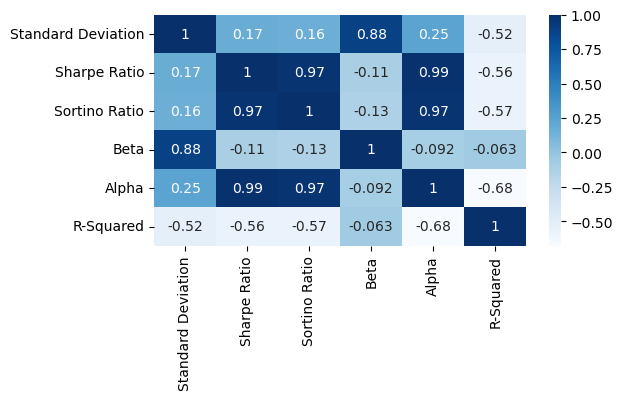

In [41]:
plt.figure(figsize=(6,3))
sns.heatmap(one_hybrid.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [42]:
df = one_hybrid.iloc[:, -9:]
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,50.01,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.25,12.52,1.61
Axis Children's Gift - Direct Plan,NaN,NaN,3.82,24.49,1.78,14.60,17.04,28.04,-6.22
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,15.86,16.65,25.04,-3.95
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,18.36,18.47,-5.62
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,48.40,-13.38,-3.81,32.23,55.77,-3.76
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,1.98,17.97,16.78,24.30,6.08
Canara Robeco Equity Hybrid Fund - Direct Plan,45.94,6.79,4.70,26.83,2.61,12.97,21.07,24.26,2.60
DSP Equity & Bond Fund - Direct Plan,45.85,5.58,9.25,29.16,-4.11,15.34,18.18,25.48,-1.70


In [43]:
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,50.01,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.25,12.52,1.61
Axis Children's Gift - Direct Plan,NaN,NaN,3.82,24.49,1.78,14.60,17.04,28.04,-6.22
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,15.86,16.65,25.04,-3.95
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,18.36,18.47,-5.62


In [44]:
df.shape

(48, 9)

In [45]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,25.000000,26.000000,28.000000,31.000000,33.000000,38.000000,42.000000,44.000000,45.000000
mean,41.724800,3.631923,7.197500,27.131613,-1.577273,9.679474,15.731429,27.433182,3.104667
std,9.563962,3.806190,3.626705,6.156366,3.416785,5.370107,6.594203,11.045441,4.709363
min,26.440000,-6.140000,0.610000,15.020000,-13.380000,-6.840000,-4.550000,12.520000,-6.220000
25%,33.240000,1.555000,4.677500,24.065000,-3.600000,7.627500,13.220000,23.037500,-0.460000
50%,44.110000,3.230000,7.105000,26.720000,-0.990000,9.990000,15.090000,25.300000,3.160000
75%,47.930000,5.940000,9.620000,29.180000,1.070000,13.705000,17.612500,28.297500,6.290000
max,56.830000,11.060000,15.230000,48.400000,2.790000,17.970000,37.280000,80.010000,15.260000


number of mutual funds in each year

In [46]:
df.count()

2014    25
2015    26
2016    28
2017    31
2018    33
2019    38
2020    42
2021    44
2022    45
dtype: int64

number of years each mutual fund is operating

In [47]:
df.count(axis=1)

Funds
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan                 9
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan         3
Axis Children's Gift - Direct Plan                                         7
Axis Equity Hybrid Fund - Direct Plan                                      4
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan               3
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             6
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    5
Canara Robeco Equity Hybrid Fund - Direct Plan                             9
DSP Equity & Bond Fund - Direct Plan                                       9
Edelweiss Aggressive Hybrid Fund - Direct Plan                             9
Franklin India Equity Hybrid Fund - Direct Plan                            9
HDFC Children's Gift Fund - Direct Plan                                    9
HDFC Hybrid Equity Fund - Direct Plan                                 

average return of all funds by year

In [48]:
df.mean()

2014    41.724800
2015     3.631923
2016     7.197500
2017    27.131613
2018    -1.577273
2019     9.679474
2020    15.731429
2021    27.433182
2022     3.104667
dtype: float64

percentage of funds having positive return by year

In [49]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015     84.615385
2016    100.000000
2017    100.000000
2018     33.333333
2019     94.736842
2020     97.619048
2021    100.000000
2022     71.111111
dtype: float64

Select funds with minimum years of history and from recent years

In [50]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(42, 9)

In [51]:
dfd.count(axis=1)

Funds
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan                 9
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan         3
Axis Children's Gift - Direct Plan                                         7
Axis Equity Hybrid Fund - Direct Plan                                      4
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan               3
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             6
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    5
Canara Robeco Equity Hybrid Fund - Direct Plan                             9
DSP Equity & Bond Fund - Direct Plan                                       9
Edelweiss Aggressive Hybrid Fund - Direct Plan                             9
Franklin India Equity Hybrid Fund - Direct Plan                            9
HDFC Children's Gift Fund - Direct Plan                                    9
HDFC Hybrid Equity Fund - Direct Plan                                 

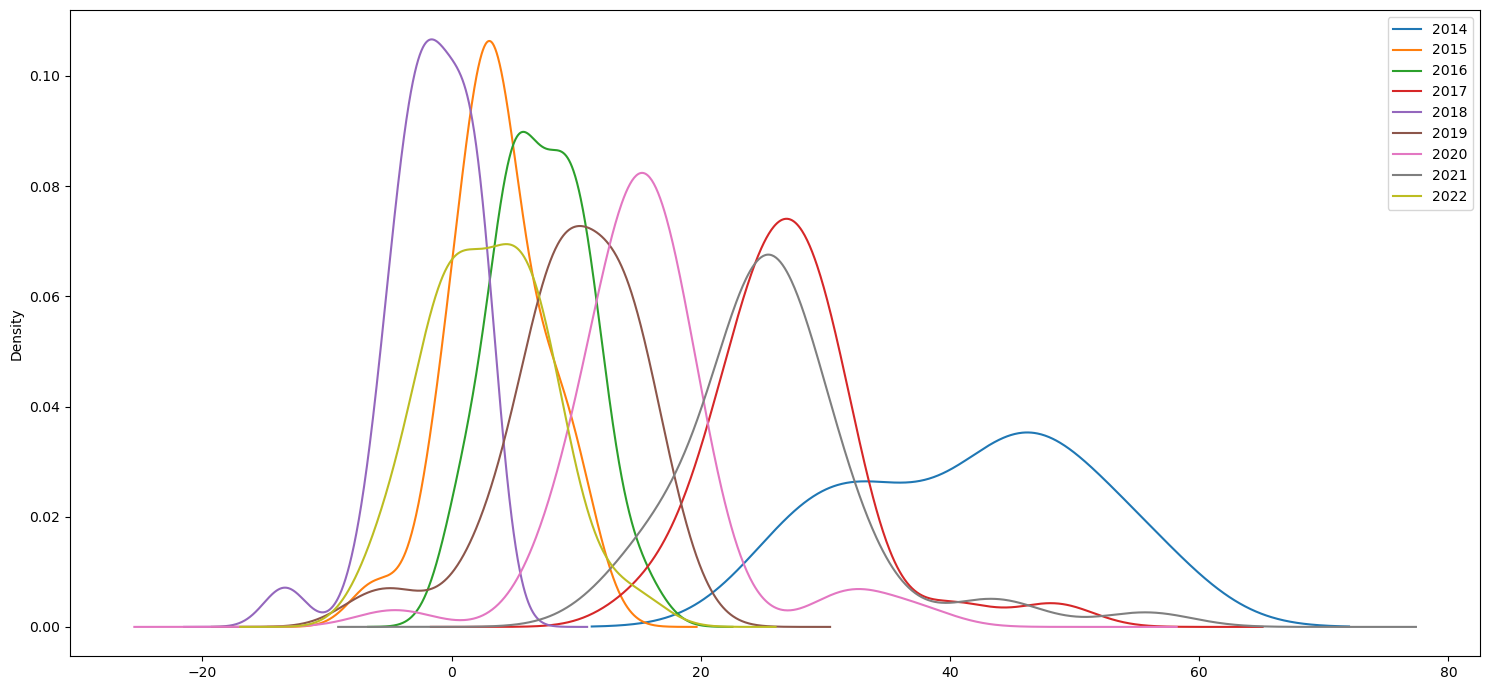

In [52]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [53]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [54]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [55]:
cagr.sort_values(ascending=False)

Funds
Quant Absolute Fund - Direct Plan                                          0.199676
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan                0.190882
ICICI Prudential Equity & Debt Fund - Direct Plan                          0.173769
Tata Retirement Savings Fund - Moderate Plan - Direct Plan                 0.165862
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             0.161160
HDFC Hybrid Equity Fund - Direct Plan                                      0.160534
HDFC Children's Gift Fund - Direct Plan                                    0.157621
Canara Robeco Equity Hybrid Fund - Direct Plan                             0.156568
SBI Equity Hybrid Fund - Direct Plan                                       0.151486
DSP Equity & Bond Fund - Direct Plan                                       0.149465
Franklin India Equity Hybrid Fund - Direct Plan                            0.148248
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan       

# Ergodic Sum

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
values = dfd.to_numpy()

In [58]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [59]:
scaled = np.round(scaled, 3)

In [60]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [61]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,5.337,1.176,2.878,4.549,-1.150,1.047,1.928,3.314,-0.205
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.494,1.652,0.341
Axis Children's Gift - Direct Plan,NaN,NaN,1.073,4.044,0.529,2.755,2.615,3.699,-1.317
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,2.993,2.556,3.304,-0.837
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.818,2.437,-1.190
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,7.992,-3.977,-0.719,4.947,7.358,-0.796
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,0.588,3.391,2.576,3.206,1.288
Canara Robeco Equity Hybrid Fund - Direct Plan,4.902,1.819,1.320,4.430,0.776,2.448,3.234,3.201,0.551
DSP Equity & Bond Fund - Direct Plan,4.893,1.495,2.597,4.815,-1.222,2.895,2.790,3.362,-0.360


In [62]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2014    1.000000
2015    0.846154
2016    1.000000
2017    1.000000
2018    0.333333
2019    0.947368
2020    0.976190
2021    1.000000
2022    0.690476
dtype: float64

In [63]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
Quant Absolute Fund - Direct Plan                                          3.122333
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan                2.891333
ICICI Prudential Equity & Debt Fund - Direct Plan                          2.851222
Tata Retirement Savings Fund - Moderate Plan - Direct Plan                 2.592889
Mirae Asset Hybrid Equity Fund - Direct Plan                               2.567714
HDFC Hybrid Equity Fund - Direct Plan                                      2.533333
HDFC Children's Gift Fund - Direct Plan                                    2.522333
Canara Robeco Equity Hybrid Fund - Direct Plan                             2.520111
SBI Equity Hybrid Fund - Direct Plan                                       2.456111
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            2.448500
Franklin India Equity Hybrid Fund - Direct Plan                            2.372778
Motilal Oswal Equity Hybrid Fund - Direct Plan                        

without standardizing

In [64]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
Quant Absolute Fund - Direct Plan                                 21.330000
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan       19.590000
ICICI Prudential Equity & Debt Fund - Direct Plan                 18.293333
Tata Retirement Savings Fund - Moderate Plan - Direct Plan        17.577778
HDFC Hybrid Equity Fund - Direct Plan                             16.831111
HDFC Children's Gift Fund - Direct Plan                           16.550000
Canara Robeco Equity Hybrid Fund - Direct Plan                    16.418889
SBI Equity Hybrid Fund - Direct Plan                              15.882222
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan    15.750000
Franklin India Equity Hybrid Fund - Direct Plan                   15.538889
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [65]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,20.0,18.0,22.0,19.0,8.0,7.0,9.0,22.0,9.0
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1.0,18.0
Axis Children's Gift - Direct Plan,NaN,NaN,4.5,11.0,27.0,33.0,30.0,31.0,1.0
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,36.0,26.0,21.0,3.0
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,35.0,6.0,2.0
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,31.0,1.0,2.0,41.0,42.0,4.0
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,29.0,38.0,27.0,15.0,30.0
Canara Robeco Equity Hybrid Fund - Direct Plan,17.0,21.0,8.0,18.0,32.0,26.0,39.0,14.0,20.0
DSP Equity & Bond Fund - Direct Plan,16.0,19.0,20.0,22.5,6.0,34.0,34.0,23.0,7.0


Percentile ranking of funds

In [66]:
dfdr = dfdr/dfdr.count()*100
dfdr.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,80.0,69.230769,78.571429,61.290323,24.242424,18.421053,21.428571,52.380952,21.428571
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,59.523810,2.380952,42.857143
Axis Children's Gift - Direct Plan,NaN,NaN,16.071429,35.483871,81.818182,86.842105,71.428571,73.809524,2.380952
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,94.736842,61.904762,50.000000,7.142857
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,83.333333,14.285714,4.761905


## Funds in top percentile

In [67]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [68]:
top_percentile.name = 'top_percentile'

In [69]:
top_percentile.head(10)

Funds
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan        1.000000
Mirae Asset Hybrid Equity Fund - Direct Plan                       1.000000
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan    0.833333
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan            0.800000
ICICI Prudential Equity & Debt Fund - Direct Plan                  0.777778
DSP Equity & Bond Fund - Direct Plan                               0.777778
Axis Equity Hybrid Fund - Direct Plan                              0.750000
Motilal Oswal Equity Hybrid Fund - Direct Plan                     0.750000
HDFC Hybrid Equity Fund - Direct Plan                              0.666667
SBI Equity Hybrid Fund - Direct Plan                               0.666667
Name: top_percentile, dtype: float64

## Average percentile rank

In [70]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [71]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,rank
Funds,,,,,,,,,,
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,90.476190,92.857143,77.380952,0.869048
Mirae Asset Hybrid Equity Fund - Direct Plan,NaN,NaN,82.142857,80.645161,100.000000,76.315789,52.380952,57.142857,57.142857,0.722529
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,87.878788,100.000000,64.285714,35.714286,71.428571,0.718615
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,NaN,NaN,NaN,83.870968,75.757576,42.105263,88.095238,61.904762,73.809524,0.709239
Quant Absolute Fund - Direct Plan,96.0,61.538462,35.714286,25.806452,57.575758,23.684211,100.000000,97.619048,100.000000,0.664376
HDFC Children's Gift Fund - Direct Plan,48.0,46.153846,64.285714,93.548387,66.666667,31.578947,85.714286,71.428571,88.095238,0.661635
ICICI Prudential Equity & Debt Fund - Direct Plan,72.0,53.846154,100.000000,45.161290,60.606061,52.631579,11.904762,95.238095,97.619048,0.654452
HDFC Hybrid Equity Fund - Direct Plan,88.0,65.384615,85.714286,64.516129,48.484848,36.842105,35.714286,64.285714,95.238095,0.649089
Canara Robeco Equity Hybrid Fund - Direct Plan,68.0,80.769231,28.571429,58.064516,96.969697,68.421053,92.857143,33.333333,47.619048,0.638450


# More than mean returns

In [72]:
dfd.mean()

2014    41.724800
2015     3.631923
2016     7.197500
2017    27.131613
2018    -1.577273
2019     9.679474
2020    15.731429
2021    26.160952
2022     2.981190
dtype: float64

Excess return of fund (fund return - mean return in year)

In [73]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,8.2852,0.758077,3.0525,0.418387,-2.292727,-4.129474,-3.171429,-1.040952,-3.95119
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,0.518571,-13.640952,-1.37119
Axis Children's Gift - Direct Plan,NaN,NaN,-3.3775,-2.641613,3.357273,4.920526,1.308571,1.879048,-9.20119
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,6.180526,0.918571,-1.120952,-6.93119
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.628571,-7.690952,-8.60119
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,21.268387,-11.802727,-13.489474,16.498571,29.609048,-6.74119
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,3.557273,8.290526,1.048571,-1.860952,3.09881
Canara Robeco Equity Hybrid Fund - Direct Plan,4.2152,3.158077,-2.4975,-0.301613,4.187273,3.290526,5.338571,-1.900952,-0.38119
DSP Equity & Bond Fund - Direct Plan,4.1252,1.948077,2.0525,2.028387,-2.532727,5.660526,2.448571,-0.680952,-4.68119


## alpha

In [74]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
Quant Absolute Fund - Direct Plan                                          6.692044
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             5.890436
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan                4.632143
ICICI Prudential Equity & Debt Fund - Direct Plan                          3.632044
Tata Retirement Savings Fund - Moderate Plan - Direct Plan                 3.155377
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    2.826846
HDFC Hybrid Equity Fund - Direct Plan                                      2.269821
Mirae Asset Hybrid Equity Fund - Direct Plan                               2.140731
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            1.938769
HDFC Children's Gift Fund - Direct Plan                                    1.838710
Canara Robeco Equity Hybrid Fund - Direct Plan                             1.678710
DSP Equity & Bond Fund - Direct Plan                                  

## Funds consistently given positive excess returns

In [75]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [76]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,consistency
Funds,,,,,,,,,,
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,3.658571,6.929048,3.30881,1.000000
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,NaN,NaN,NaN,3.718387,2.647273,-0.969474,3.068571,0.059048,3.10881,0.833333
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,3.557273,8.290526,1.048571,-1.860952,3.09881,0.800000
HDFC Children's Gift Fund - Direct Plan,2.2552,-0.491923,1.4425,4.818387,1.317273,-1.609474,2.738571,1.369048,4.70881,0.777778
Motilal Oswal Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,7.910526,1.618571,-11.020952,1.60881,0.750000
Mirae Asset Hybrid Equity Fund - Direct Plan,NaN,NaN,3.5225,3.128387,4.367273,4.150526,-0.381429,-0.600952,0.79881,0.714286
SBI Equity Hybrid Fund - Direct Plan,2.3852,4.888077,-2.1775,1.908387,2.467273,4.560526,-2.091429,-1.670952,0.00881,0.666667
DSP Equity & Bond Fund - Direct Plan,4.1252,1.948077,2.0525,2.028387,-2.532727,5.660526,2.448571,-0.680952,-4.68119,0.666667
HDFC Hybrid Equity Fund - Direct Plan,10.7352,0.388077,3.7525,1.738387,-0.032727,-1.449474,-1.641429,0.339048,6.59881,0.666667


# All Metrics

In [77]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [78]:
all_metrics['Rating'] = all_hybrid.loc[all_metrics.index]['Rating']

In [79]:
all_metrics

,consistency,top_percentile,rank,cagr,ergodic,alpha,Rating
Funds,,,,,,,
Quant Absolute Fund - Direct Plan,0.666667,0.666667,0.664376,0.199676,3.122333,6.692044,5.0
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan,1.000000,1.000000,0.869048,0.190882,2.891333,4.632143,4.0
ICICI Prudential Equity & Debt Fund - Direct Plan,0.666667,0.777778,0.654452,0.173769,2.851222,3.632044,5.0
Tata Retirement Savings Fund - Moderate Plan - Direct Plan,0.666667,0.666667,0.622144,0.165862,2.592889,3.155377,3.0
Mirae Asset Hybrid Equity Fund - Direct Plan,0.714286,1.000000,0.722529,0.142212,2.567714,2.140731,4.0
HDFC Hybrid Equity Fund - Direct Plan,0.666667,0.666667,0.649089,0.160534,2.533333,2.269821,3.0
HDFC Children's Gift Fund - Direct Plan,0.777778,0.666667,0.661635,0.157621,2.522333,1.838710,4.0
Canara Robeco Equity Hybrid Fund - Direct Plan,0.555556,0.666667,0.638450,0.156568,2.520111,1.678710,4.0
SBI Equity Hybrid Fund - Direct Plan,0.666667,0.666667,0.573423,0.151486,2.456111,1.142044,4.0


In [80]:
all_hybrid.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Quant Absolute Fund - Direct Plan,5.0,HY-AH,0.56,2013-01-01 00:00:00,950.0,3.3,Below Average,High,Very High,18.19,...,0.71,56.66,3.86,5.07,23.80,-0.92,7.29,37.28,44.59,15.26
Mahindra Manulife Hybrid Equity Nivesh Yojana - Direct Plan,4.0,HY-AH,0.52,2019-07-19 00:00:00,608.0,3.6,Below Average,Above Average,Very High,16.57,...,0.94,NaN,NaN,NaN,NaN,NaN,NaN,19.39,33.09,6.29
ICICI Prudential Equity & Debt Fund - Direct Plan,5.0,HY-AH,1.20,2013-01-01 00:00:00,21282.0,9.3,Average,High,Very High,19.26,...,0.82,46.72,3.27,15.23,26.56,-0.71,10.04,9.52,42.40,12.32
Tata Retirement Savings Fund - Moderate Plan - Direct Plan,3.0,HY-AH,0.66,2013-01-01 00:00:00,1616.0,6.8,Average,Average,Very High,16.31,...,0.92,56.83,9.30,8.14,40.28,-2.40,10.32,16.79,22.26,-0.46
Mirae Asset Hybrid Equity Fund - Direct Plan,4.0,HY-AH,0.36,2015-07-29 00:00:00,7194.0,6.4,Below Average,Above Average,Very High,16.51,...,0.97,NaN,NaN,10.72,30.26,2.79,13.83,15.35,25.56,3.78
HDFC Hybrid Equity Fund - Direct Plan,3.0,HY-AH,1.12,2013-01-01 00:00:00,19174.0,4.6,Average,Average,Very High,18.21,...,0.94,52.46,4.02,10.95,28.87,-1.61,8.23,14.09,26.50,9.58
HDFC Children's Gift Fund - Direct Plan,4.0,HY-AH,0.97,2013-01-01 00:00:00,6100.0,10.0,Below Average,Above Average,Very High,17.06,...,0.92,43.98,3.14,8.64,31.95,-0.26,8.07,18.47,27.53,7.69
Canara Robeco Equity Hybrid Fund - Direct Plan,4.0,HY-AH,0.60,2013-01-01 00:00:00,8406.0,9.3,Low,Above Average,Very High,14.87,...,0.95,45.94,6.79,4.70,26.83,2.61,12.97,21.07,24.26,2.60
SBI Equity Hybrid Fund - Direct Plan,4.0,HY-AH,0.79,2013-01-01 00:00:00,56710.0,10.0,Below Average,Average,Very High,16.04,...,0.93,44.11,8.52,5.02,29.04,0.89,14.24,13.64,24.49,2.99


<AxesSubplot:>

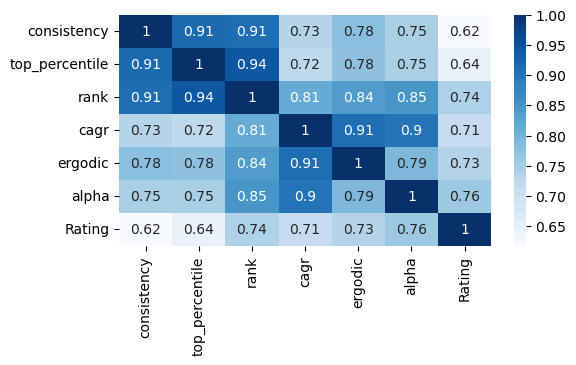

In [82]:
plt.figure(figsize=(6,3))
sns.heatmap(all_metrics.corr(), annot=True, cmap='Blues')

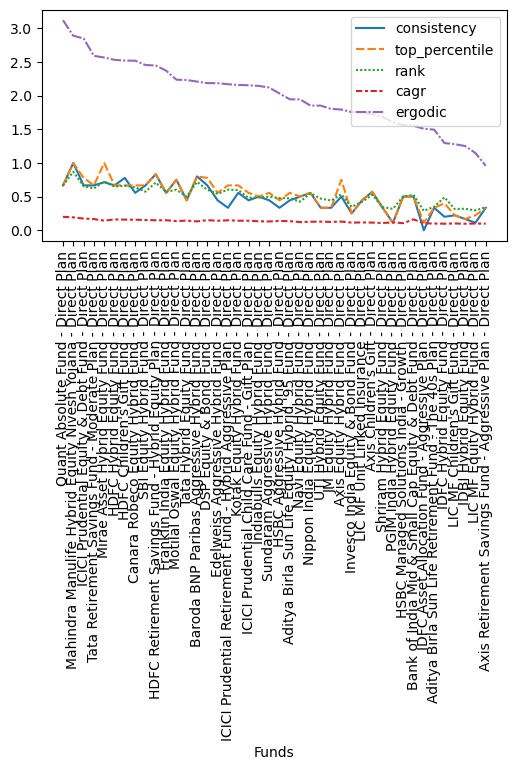

In [83]:
plt.figure(figsize=(6,3))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

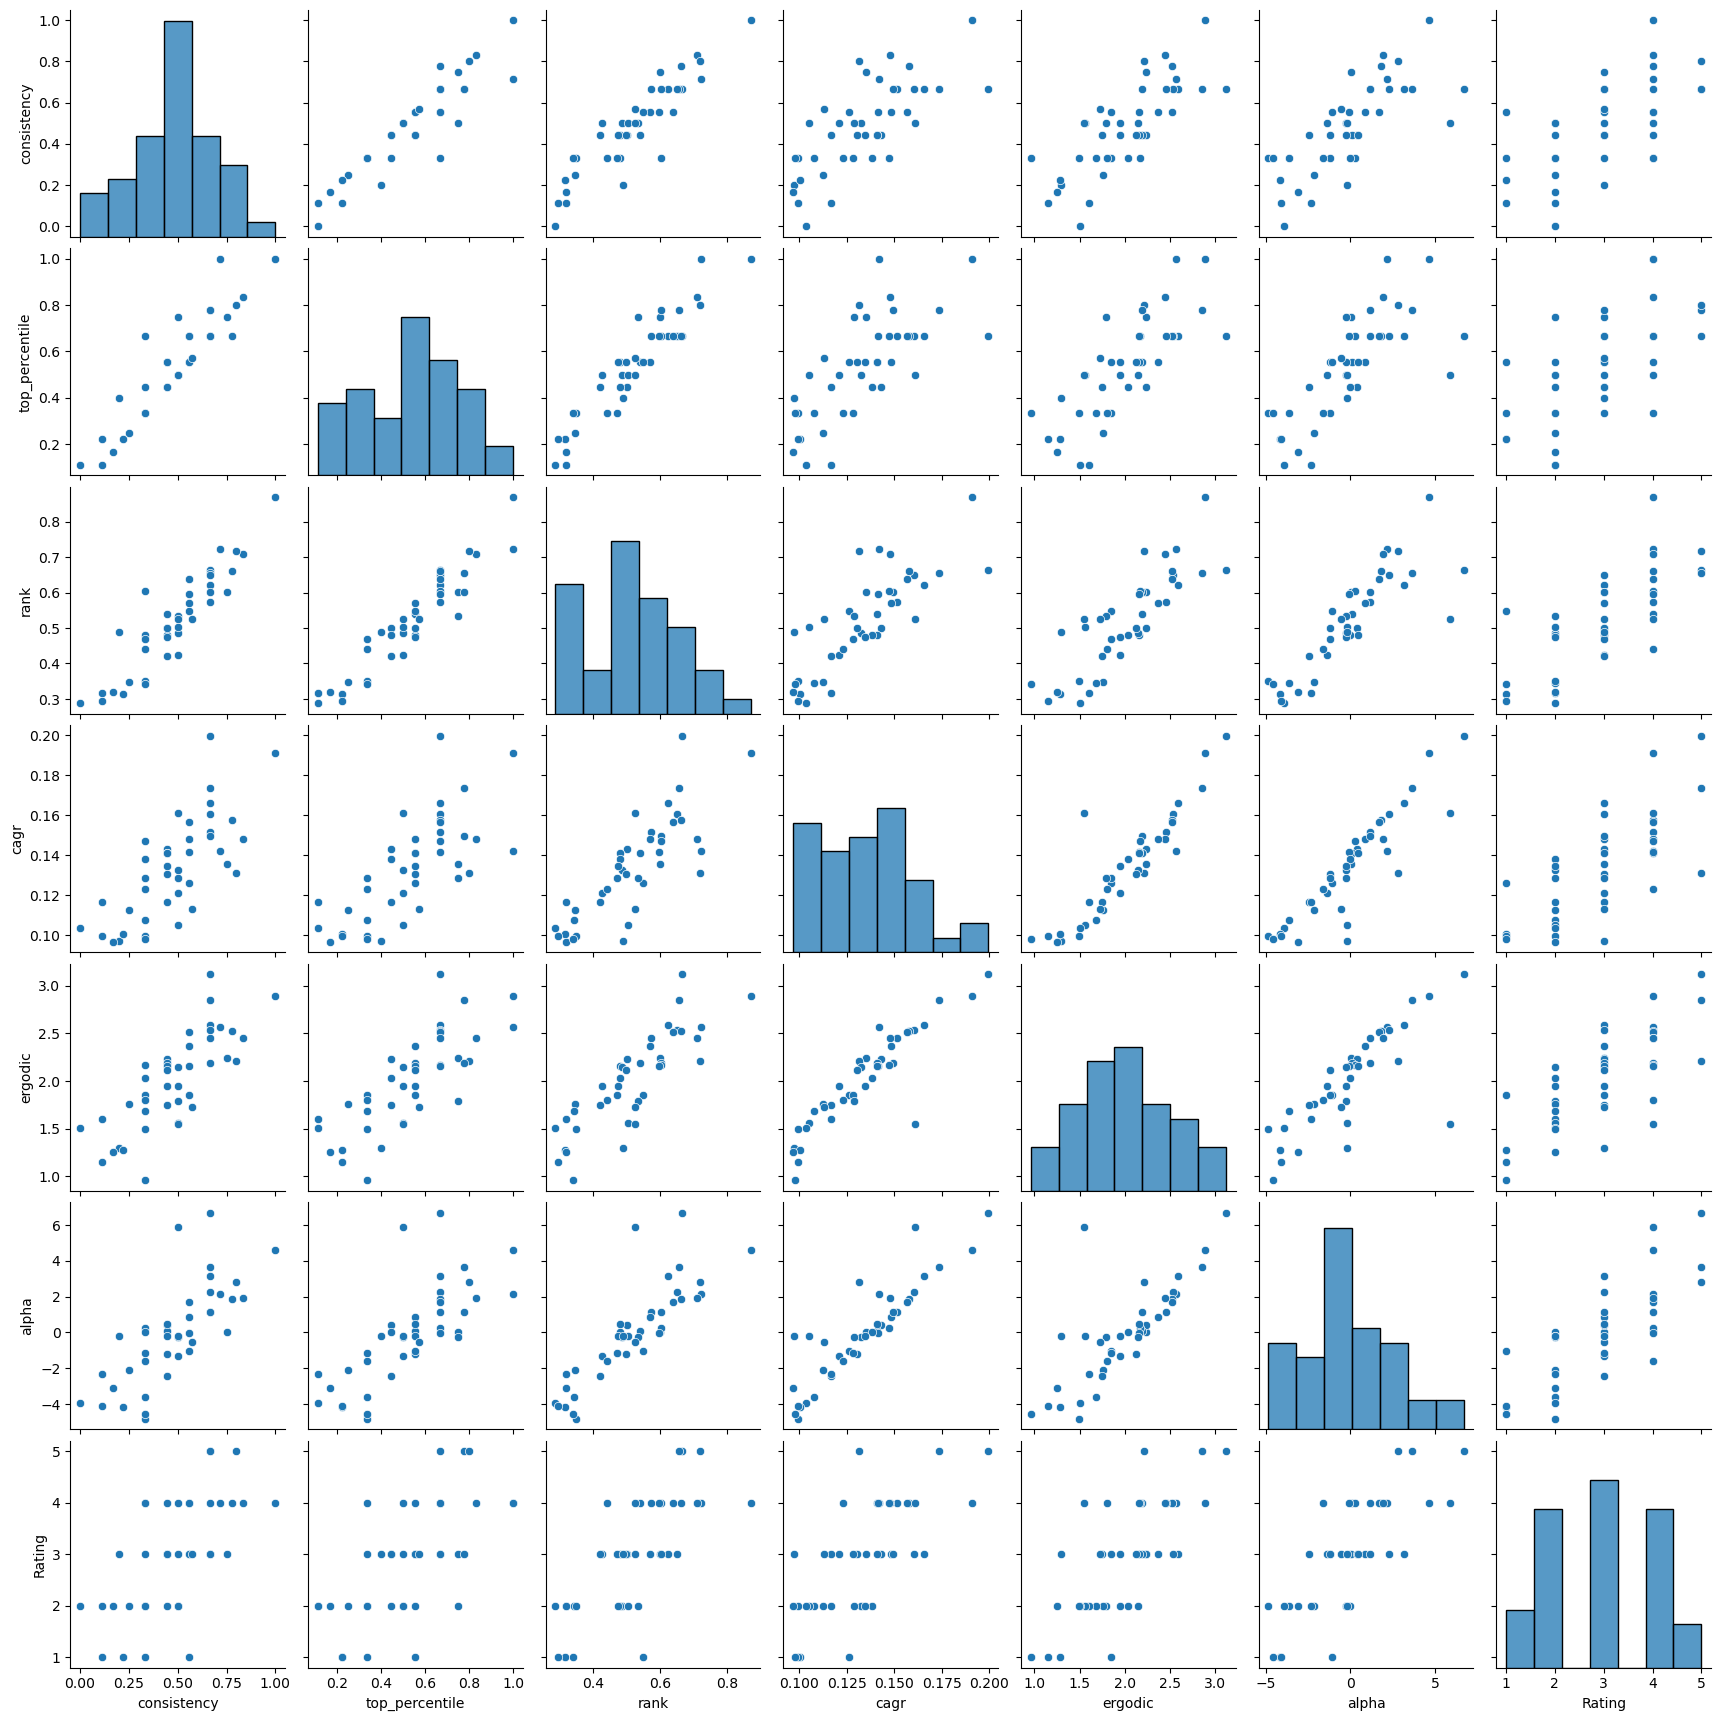

In [84]:
sns.pairplot(all_metrics)

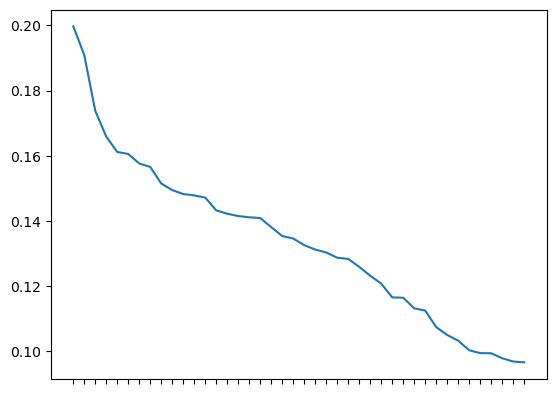

In [85]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

In [86]:
high = [2007,2009,2010,2012,2014,2017,2019,2020,2021]
low = [2008,2011,2013,2015,2016,2018,2022]
s1 = dfdr.loc[:, high[-4:]].mean(axis=1).rename('high')
s2 = dfdr.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('diff', ascending=False)

,high,low,diff
Funds,,,
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,75.720551,6.277056,69.443495
Axis Equity Hybrid Fund - Direct Plan,68.880535,7.142857,61.737678
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,48.809524,4.761905,44.047619
DSP Equity & Bond Fund - Direct Plan,74.442154,35.425685,39.016468
HSBC Managed Solutions India - Growth - Direct Plan,67.952138,31.998557,35.953581
Axis Children's Gift - Direct Plan,66.891018,33.423521,33.467497
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan,67.857143,45.238095,22.619048
Tata Retirement Savings Fund - Moderate Plan - Direct Plan,60.628385,41.702742,18.925644
HSBC Aggressive Hybrid Fund - Direct Plan,46.747918,28.174603,18.573315


A colorful plot to end.

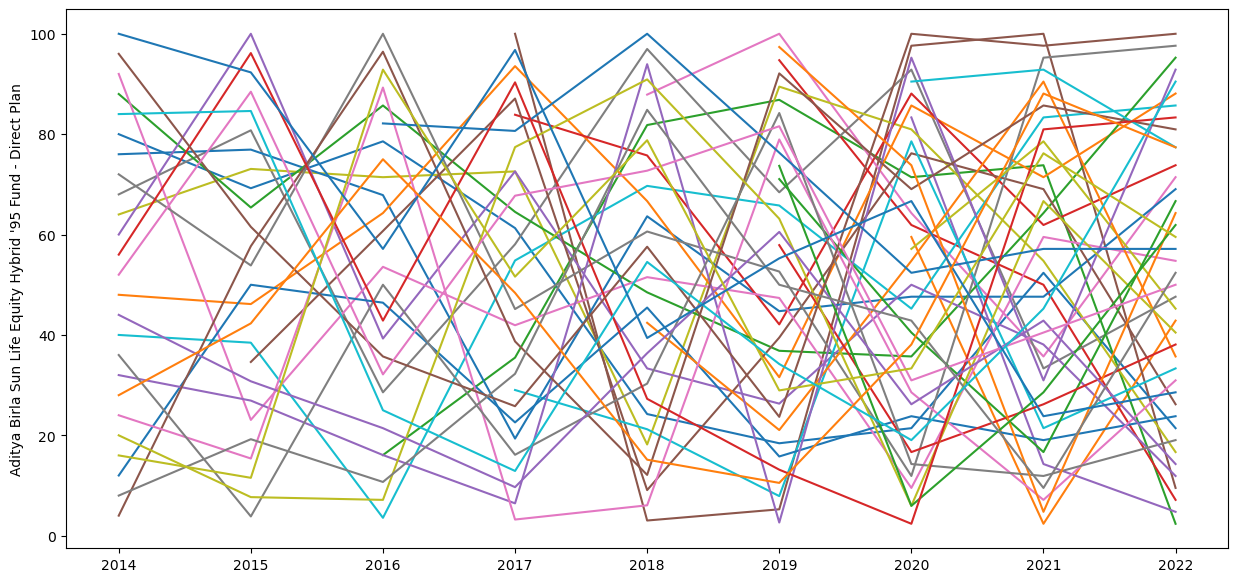

In [87]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)